# Housing Price Prediction

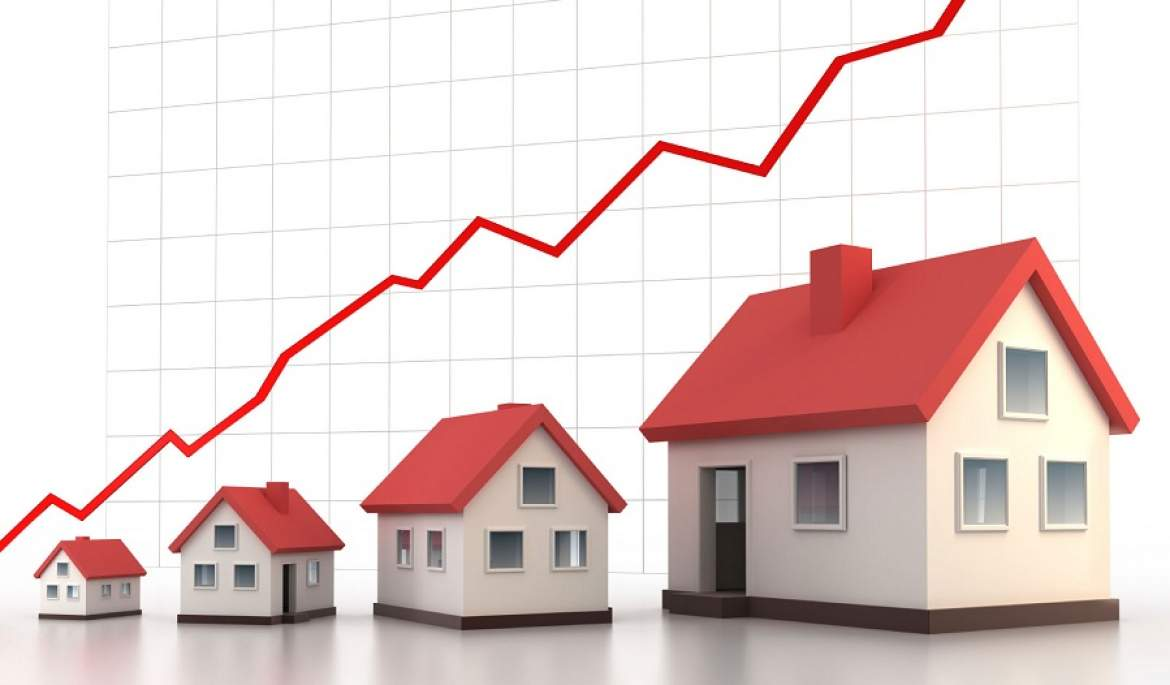

## Problem Statement 
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 


The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.


Also, determine the optimal value of lambda for ridge and lasso regression.


## Business Goal 


You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Methodology
Model development is divided into multiple steps as mentioned below,

- Data exploring and understanding: This step involves preliminary level data understanding and exploring.
- Data Cleaning: This step includes cleaning the existing data. We check the data for any missing values and treat them as per the requirements. We also need to look for constant value colulmns as that is not going to add any additional value to out analysis. Sometimes columns with very high proportion of any particular value also doesn't add any values. Hence, getting rid of them helps with further analysis.
- Data Visualization: This step involves visualizing our dataset and check for relationship amongst independent variables. We can also reduce some feature columns here but it should not be aggressive.
- Data Preparation: This step is mainly usefull for feeding in the data into the model. It involves steps like creating dummy variables, scaling etc. depending upond the data type.
- Train-test split: As data already training data this step may be skipped.
- Model Development-validation and evaluaiton: This steps involves training the model and validate it. It involves evaluating the model using relevant matrics.
- Conclusion/Recommendation: It involves drawing conclusions and recommendations to business.

### Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
%matplotlib inline

### Reading Dataset

In [2]:
#Reading data
#Housing data= hd
train= pd.read_csv(r"C:\Users\Rohit Chaudhary\Desktop\Upgrad notes\ML2\Assignment\train.csv")
test= pd.read_csv(r"C:\Users\Rohit Chaudhary\Desktop\Upgrad notes\ML2\Assignment\test.csv")

In [3]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


0    208500
1    181500
2    223500
3    140000
4    250000

0    1710.0
1    1040.0
2    1279.0
3     778.0
4     988.0

In [5]:
test.shape

(1459, 80)

In [6]:
y_train= train["SalePrice"]

In [7]:
train=train.drop(["SalePrice"], axis=1)

In [8]:
hd=pd.concat([train,test], axis=0)

In [9]:
hd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


0    208500
1    181500
2    223500
3    140000
4    250000

0    1710.0
1    1040.0
2    1279.0
3     778.0
4     988.0

In [10]:
hd.shape

(2919, 80)

## 1. Data Understanding and Exploration

In [11]:
#Understanding data
hd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [12]:
#Lets check null values 
hd.isnull().sum()/hd.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
B

In [13]:
#Dropping columns with null value ~50% including variable FireplaceQu having 47.26% null values. 
#Further Nill value label is avaible in theses variables thus chances of these null vales being None are less.
hd=hd.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis = 1)

In [14]:
#As we can see there are multiple categorical varaibles lets list them out as ordinal, nominal categorical variables,
#Continous/numeric variavles, year & month etc.
nominal = ["MSSubClass","MSZoning","Street","LandContour","Utilities","LotConfig","LandSlope"
    ,"Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st"
    ,"Exterior2nd","MasVnrType","Foundation","Heating","HeatingQC","CentralAir","Electrical","Functional"
    ,"GarageType","PavedDrive","SaleType","SaleCondition"]

ordinal = ["LotShape","OverallQual","OverallCond","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure",
         "BsmtFinType1","BsmtFinType2","KitchenQual","GarageFinish","GarageQual","GarageCond"]

numeric = ["LotFrontage","LotArea","MasVnrArea","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF",
         "LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr",
         "KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea","WoodDeckSF",
        "OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","BsmtFinSF1","BsmtFinSF2"]

year_month = ["YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]

In [15]:
#Lets check for dupliacte values
hd.duplicated().value_counts()

False    2919
dtype: int64

## 2. Data Visualization

# lets check distribution of all the numeric variables
plt.subplots(figsize=(20,110))
   
j=1
for i in numeric:
    plt.subplot(int((len(numeric)/2)+1),3,j)
    sns.histplot(hd[i])
    plt.xticks(rotation=90)
    j=j+1 

In [16]:
# ALl the Numeric variables are either int or float type data type
#Lot size and MiscVal has higher values in comparison to other numeric varaibles, thus they will be analyzied seperately
numeric.remove("LotArea") 
numeric.remove("MiscVal") 

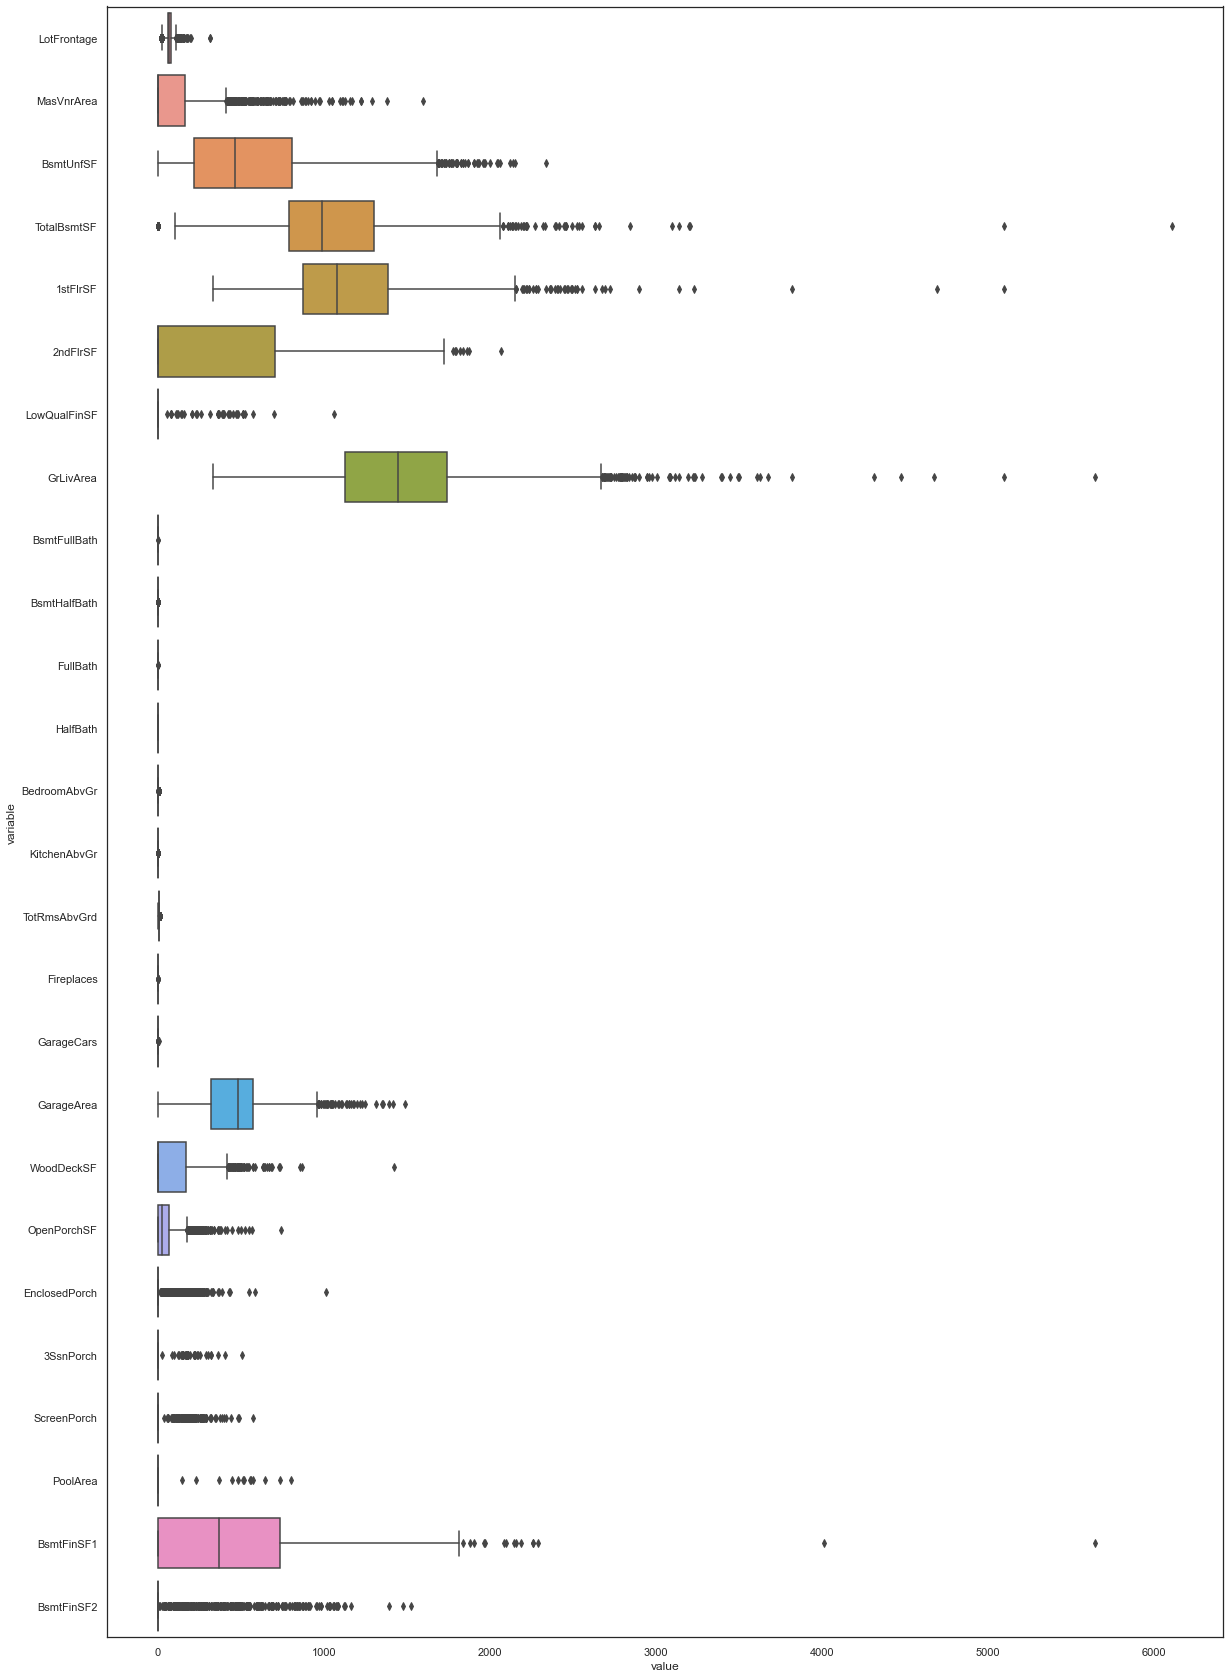

In [17]:
#Lets do the univariate analysis on Numeric data typesLotArea
plt.figure(figsize=(20,30))
sns.boxplot(x="value", y="variable",data=pd.melt(hd[numeric]))
plt.show()

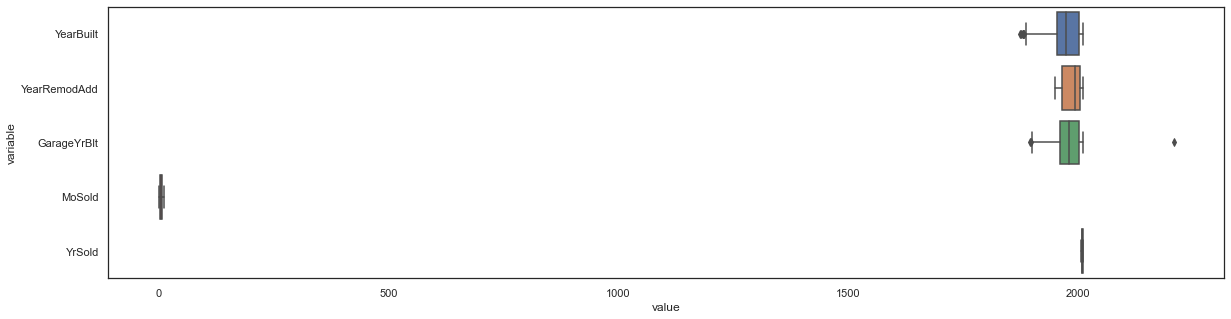

In [18]:
#Lets also check outliers in year and month data
plt.figure(figsize=(20,5))
sns.boxplot(x="value", y="variable",data=pd.melt(hd[year_month]))
plt.show()

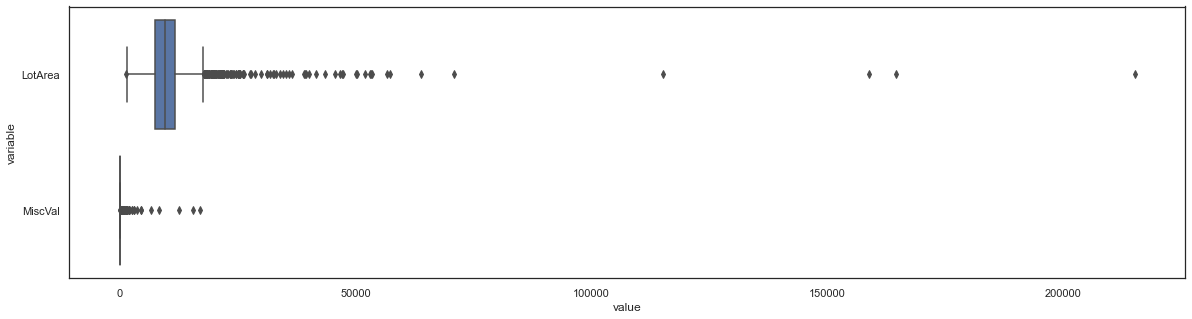

In [19]:
#box plot for LotArea and MiscVal variable
plt.figure(figsize=(20,5))
sns.boxplot(x="value", y="variable",data=pd.melt(hd[["LotArea","MiscVal"]]))
plt.show()

There are lots of outliers in various columns like LotArea, BsmtFinSF2, GrLivArea, 1stFlrSF etc. and we have to treat them before modeling. 

In [20]:
numeric.append("LotArea") 
numeric.append("MiscVal")

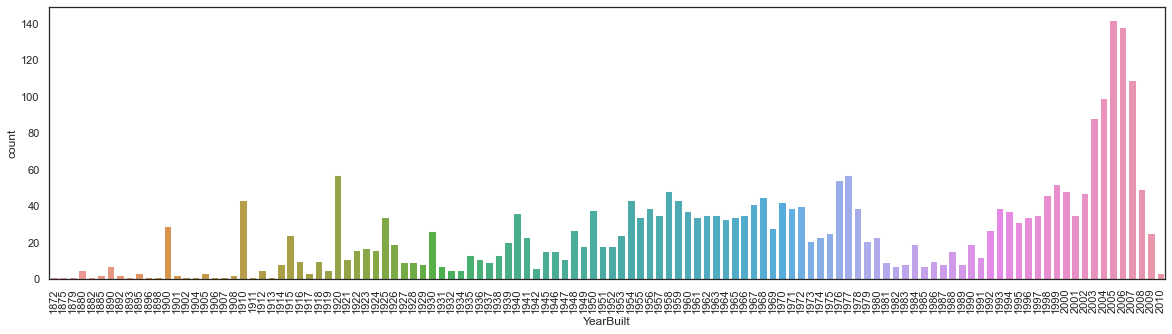

In [21]:
#Lets Visualize frequency of houses built in each year
#year_month = ["YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]
hd_YearBuilt=hd.sort_values("YearBuilt", axis =0)
plt.figure(figsize=(20,5))
sns.countplot(hd_YearBuilt["YearBuilt"])
plt.xticks(rotation =90)
plt.show()

There is a significant increase in houses being built around 2003 to 2007, may be leading to housing crash of 2008 :p

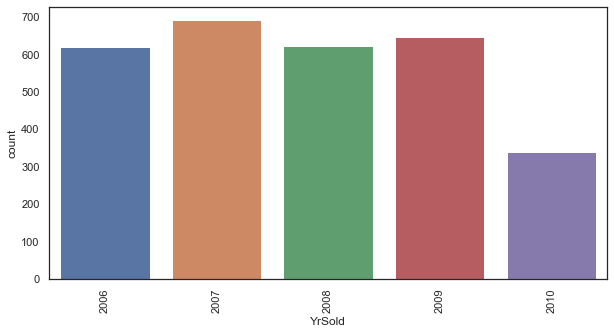

In [22]:
#Lets Visualize frequency of sales made in each year
hd_YrSold=hd.sort_values("YrSold", axis =0)
plt.figure(figsize=(10,5))
sns.countplot(hd_YrSold["YrSold"])
plt.xticks(rotation =90)
plt.show()

There is no regular trend among no. of houses sold except that no. of houses sold in 2010 has significantly decreased, however we donot know whether data is for complete year 2010  or not, so will not speculate regarding this.

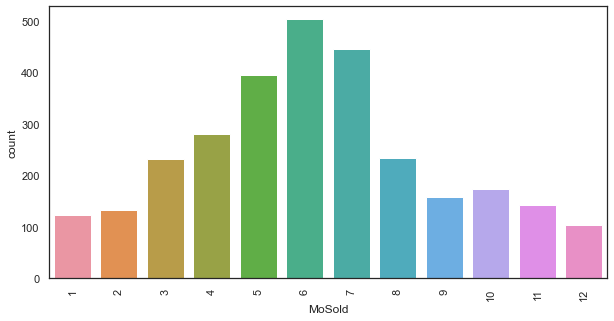

In [23]:
#Lets Visualize frequency of sales made in each month
hd_MoSold=hd.sort_values("MoSold", axis =0)
plt.figure(figsize=(10,5))
sns.countplot(hd_MoSold["MoSold"])
plt.xticks(rotation =90)
plt.show()

It seems like sales are higher in the month of May, June and July comapared to other months of year.

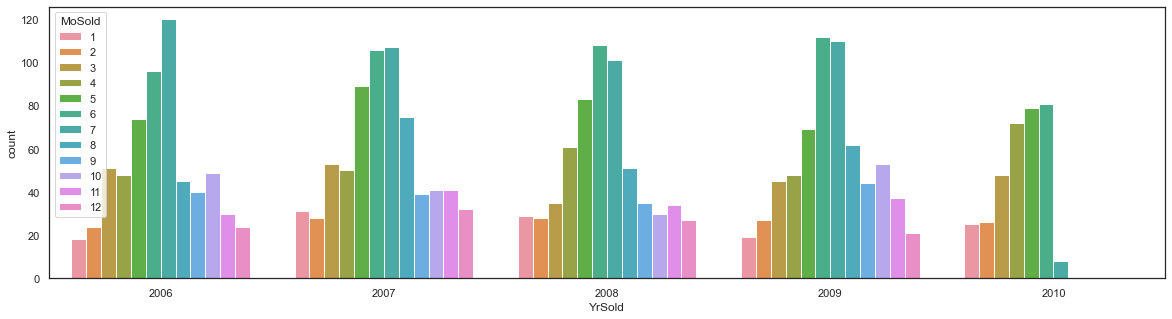

In [24]:
#Lets check whether above trend is same for all years in which houses were sold
plt.figure(figsize=(20,5))
#hd_month_yr=hd.groupby(["YrSold","MoSold"]).count().reset_index()
#hd_month_yr
sns.countplot(data=hd, x="YrSold", hue="MoSold")
plt.show()

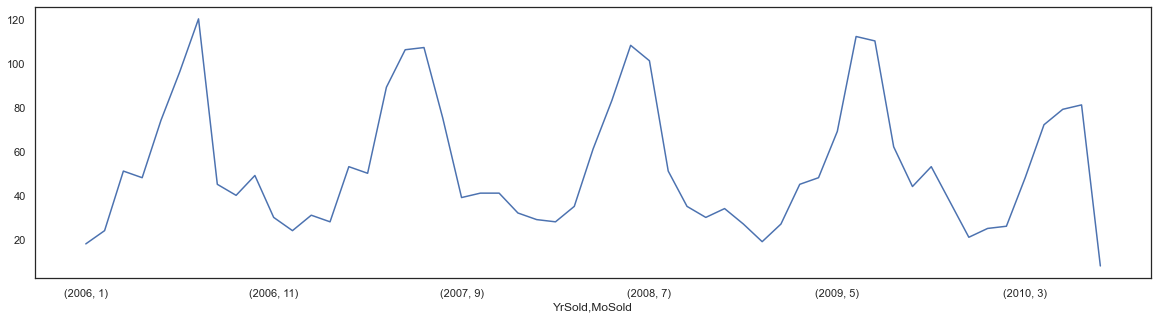

In [25]:
plt.figure(figsize=(20,5))
hd_month_yr=hd.groupby(["YrSold","MoSold"])["MoSold"].count().plot()
plt.show()

From above it is observed that sales are higher in the month of May, June and July compared to other months of year may be due spring season as the weather gets warmer in USA. Further, there is very small peak in month of October/Novemeber in sale of houses.
Also for year 2010 data is available till July month only.

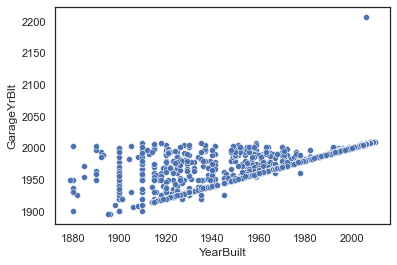

In [26]:
#Lets Visualize distribution among YearBuilt & GarageYrBlt
sns.scatterplot(data=hd,x="YearBuilt",y="GarageYrBlt")
plt.show()

After 1910 almost all the house are having garrages built along with construction of house due to rise in no of car user by 1910 in US.
- Source:
https://www.ushistory.org/us/46a.asp

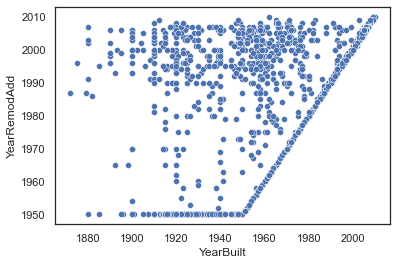

In [27]:
#Lets Visualize distribution among YearBuilt & YearRemodAdd
sns.scatterplot(data=hd,x="YearBuilt",y="YearRemodAdd")
plt.show()

After 1950 there has been no remodeling or additions performed on houses as in data it is specified that YearRemodAdd is same as construction date if no remodeling or additions.

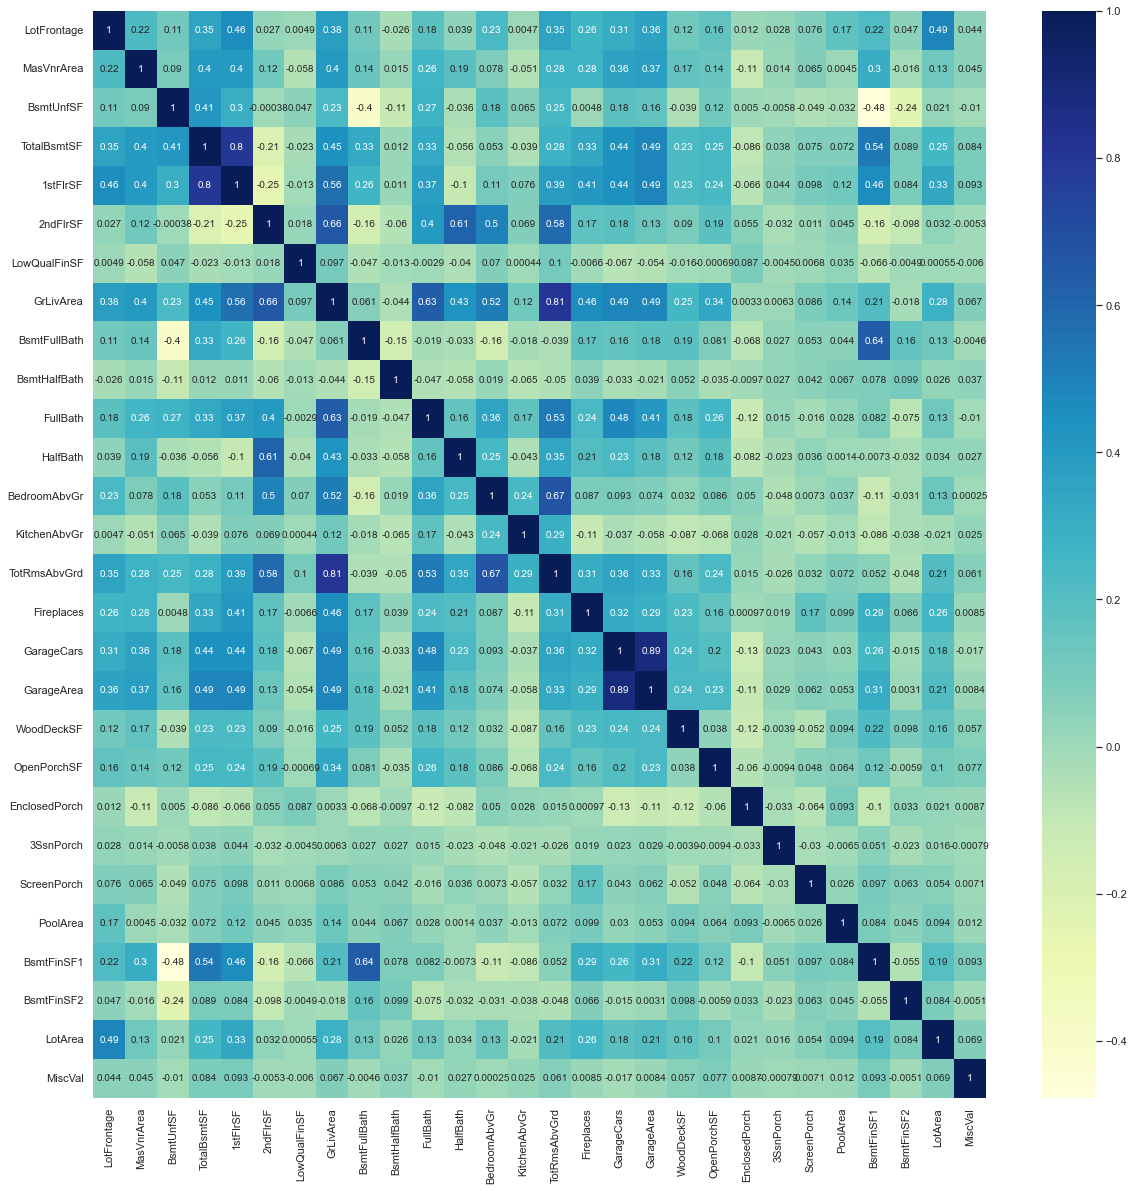

In [28]:
#Heatmap on numeric data
plt.figure(figsize=(20,20))
sns.heatmap(hd[numeric].corr(),annot= True,cmap="YlGnBu")
plt.show()

There are few columns with high corelation like (BsmtFinSF2 and BsmtfullBath),(GarageCars and Garage Area), (Ground Living area and TotRmsaboveGr),(Bedroom above ground and Total Room above Ground), (TotalBasment SF and  1st floor SF)  etc.

#Lets visualize countplot on Nominal data
plt.subplots(figsize=(20,110))
j=1
for i in nominal:
    plt.subplot(int((len(nominal)/2)+1),3,j)
    sns.countplot(hd[i])
    plt.xticks(rotation=90)
    j=j+1

#Lets visualize distribution of sales price on Nominal data
plt.subplots(figsize=(20,120))
j=1
for i in nominal:
    plt.subplot(int((len(nominal)/2)+1),2,j)
    sns.barplot(data=hd, x=i, y="SalePrice", estimator=np.median) # as there are outliers in data median is selected as estimator
    plt.xticks(rotation=90)
    j=j+1

There is very vast variation for Sale Price for various labels in the nominal variables. 

#Lets visualize countplot on Numeric data
plt.subplots(figsize=(20,110))
j=1
for i in numeric:
    plt.subplot(int((len(numeric)/2)+1),3,j)
    sns.scatterplot(data=hd, x=i ,y="SalePrice")
    j=j+1

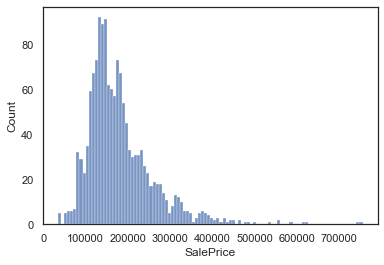

In [29]:
#Sale price is our dependent/target variable
#Lets check distribution of sales 
sns.histplot(y_train, bins=100)
plt.show()

As we can distribution is highly right skewed and also there are mainy outliers in the data.

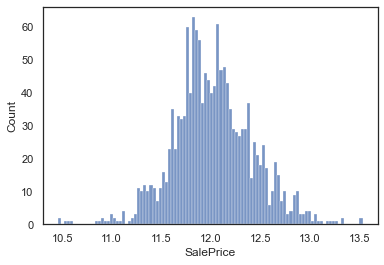

In [30]:
#Lets log transform our SalePrice as sales data is 
y_train= np.log(y_train)
sns.histplot(y_train, bins=100)
plt.show()


As seen above after log transformation data is now more bell shaped/Guassian distribution and no. of ouliers has also reduced significantly. We will check distribution of SalePrice with all the numeric variables

#Lets visualize countplot on Numeric data
plt.subplots(figsize=(20,110))
j=1
for i in numeric:
    plt.subplot(int((len(numeric)/2)+1),3,j)
    sns.scatterplot(data=hd, x=i ,y_train)
    j=j+1

After log transformation, as we can see above there are many independent Variable on which there is high correlation with Sale price like GrLivArea, TotalBsmtSF,Garage Area, 1stflrSF etc and linear relationship has also improved compared to earlier.

## 3.  Data Cleaning

### 3.1. Treating Outliers

As features columns have many outliers, we are going to drop outliers from the dataset and try to fit the algorithm. For dropping the outliers we are going to use Inter Quantile Range (IQR) method which is summarized below.

- Q1: First quanltile value or Value standing exactly at 10% (here).
- Q3: Value standing at exactly 90% (here) of the range.
- IQR is difference between Q3 and Q1 value. 

This indicates the core range for any feature which includes median as well.
Next is to drop the values which are beyond 1.5 times IQR away from either Q1 or Q3 in respective away direction. Here, away direction for Q1 is lower side and Q3 is upper side.

Note: Here we can use any value for selecting quantiles. The chosen values depend upon the amount of data available and its quality. Also we should not lose significant value of data while dropping outliers.

In [31]:
#Lets check % of outliers in the numeric variables
numeric_=numeric  
outlietrs_dict={}
for i in numeric_:
  #IQR
  IQR= hd[i].quantile(0.90)-hd[i].quantile(0.10)
  Outliers= hd[(hd[i]>(hd[i].quantile(0.90)+1.5 * IQR)) | (hd[i]<(hd[i].quantile(0.10)-1.5 * IQR))]
  outlietrs_dict[i]=Outliers.shape[0]

In [32]:
outlier_data=pd.DataFrame([outlietrs_dict]).T
outlier_data.rename(columns={0:"No_of_outliers"}, inplace =True)
outlier_data["Outlier%"]=outlier_data["No_of_outliers"]/hd.shape[0]*100
outlier_data.sort_values("Outlier%", ascending =False, inplace =True)
outlier_data

,No_of_outliers,Outlier%
ScreenPorch,256,8.770127
BsmtFinSF2,187,6.406304
BsmtHalfBath,175,5.995204
KitchenAbvGr,134,4.590613
MiscVal,103,3.528606
LowQualFinSF,40,1.370332
LotArea,37,1.267557
3SsnPorch,37,1.267557
MasVnrArea,26,0.890716
EnclosedPorch,20,0.685166


In [33]:
#As seen above there are lots of outliers in the dataset as we have limited data removing theses rows won't be a good idea.
#Let us perform flooring and capping on outliers

for i in numeric_:
    IQR= hd[i].quantile(0.90)-hd[i].quantile(0.10) #Interquartile range
    upper_bound=hd[i].quantile(0.90)+1.5 * IQR
    lower_bound=hd[i].quantile(0.10)-1.5 * IQR
    #Capping
    hd[i]=np.where(hd[i]>upper_bound, upper_bound,hd[i])
    #Flooring
    hd[i]=np.where(hd[i]<lower_bound, lower_bound,hd[i])
    

In [34]:
#Lets check % of outliers in the numeric variables after capping and flooring
outlietrs_dict={}
for i in numeric_:
  #IQR
  IQR= hd[i].quantile(0.90)-hd[i].quantile(0.10)
  Outliers= hd[(hd[i]>(hd[i].quantile(0.90)+1.5 * IQR)) | (hd[i]<(hd[i].quantile(0.10)-1.5 * IQR))]
  outlietrs_dict[i]=Outliers.shape[0]

outlier_data=pd.DataFrame([outlietrs_dict]).T
outlier_data.rename(columns={0:"No_of_outliers"}, inplace =True)
outlier_data["Outlier%"]=outlier_data["No_of_outliers"]/hd.shape[0]*100
outlier_data.sort_values("Outlier%", ascending =False, inplace =True)
outlier_data

,No_of_outliers,Outlier%
LotFrontage,0,0.0
MasVnrArea,0,0.0
LotArea,0,0.0
BsmtFinSF2,0,0.0
BsmtFinSF1,0,0.0
PoolArea,0,0.0
ScreenPorch,0,0.0
3SsnPorch,0,0.0
EnclosedPorch,0,0.0
OpenPorchSF,0,0.0


In [35]:
hd.shape

(2919, 75)

In [36]:
hd.GrLivArea.head()

0    1710.0
1    1262.0
2    1786.0
3    1717.0
4    2198.0
Name: GrLivArea, dtype: float64

## 3.2 Treating Missing values

In [37]:
# Checking columns with null value 
hd.isnull().sum()/hd.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

In [38]:
#Lets impute median value as missing values in numeric columns
num_missing=["LotFrontage","MasVnrArea","GarageYrBlt",'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageArea']
for i in num_missing:
    hd[i]=hd[i].fillna(hd[i].median())

In [39]:
hd.GrLivArea.head()

0    1710.0
1    1262.0
2    1786.0
3    1717.0
4    2198.0
Name: GrLivArea, dtype: float64

In [40]:
hd.shape

(2919, 75)

In [41]:
#Lets impute mode value as missing values in categorical columns
Cat_missing=["MasVnrType", "Electrical","MSZoning","Utilities","Exterior1st",'Exterior2nd',
             'BsmtFullBath','BsmtHalfBath','KitchenQual','Functional','SaleType','GarageCars']
for i in Cat_missing:
    hd[i]=hd[i].fillna(hd[i].mode()[0])
# for BsmtQual, BsmtCond, BsmtExposure,BsmtFinType1,BsmtFinType2,GarageType,GarageFinish,GarageQual,GarageCond  
#"NA" means No basement/No Garage
hd["BsmtQual"]=hd["BsmtQual"].fillna("No basement")
hd["BsmtCond"]=hd["BsmtCond"].fillna("No basement")
hd["BsmtExposure"]=hd["BsmtExposure"].fillna("No basement")
hd["BsmtFinType1"]=hd["BsmtFinType1"].fillna("No basement")
hd["BsmtFinType2"]=hd["BsmtFinType2"].fillna("No basement")
hd["GarageType"]=hd["GarageType"].fillna("No Garage")
hd["GarageFinish"]=hd["GarageFinish"].fillna("No Garage")
hd["GarageQual"]=hd["GarageQual"].fillna("No Garage")
hd["GarageCond"]=hd["GarageCond"].fillna("No Garage")

In [42]:
hd.shape

(2919, 75)

In [43]:
# Checking columns with null value 
hd.isnull().sum()/hd.shape[0]*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

## 4. Data Preperation

Now as we know have of many categorical variables, we need to treat these  variables in order to draw patterns from them through modelling.Now we have two types of categorical variables:
1. Nominal categorical variables
2. Ordered categorical variables

- For Nominal Nominal categorical variables we will create dummy variables; for `k` no of labels/categories in variables we will define `k-1` no. of features and original variable shall be dropped.
- For Ordered categorical variables we will implement Label encoding in incresing order of categories in variable as 0,1,2,3,4,....

### 4.1 Nominal categorical variables

In [44]:
nominal = ["MSSubClass","MSZoning","Street","LandContour","Utilities","LotConfig","LandSlope"
    ,"Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st"
    ,"Exterior2nd","MasVnrType","Foundation","Heating","HeatingQC","CentralAir","Electrical","Functional"
    ,"GarageType","PavedDrive","SaleType","SaleCondition"]

In [45]:
#Creating dummy variables for all the categorical variables

for i in nominal:
    dummy_df=pd.get_dummies(hd[i],prefix=i, drop_first =True)
    hd=pd.concat([hd,dummy_df], axis=1)
    hd=hd.drop([i], axis=1)

In [46]:
#Further for month sold also lets make dummy variable
dummy_df=pd.get_dummies(hd['MoSold'],prefix='MoSold', drop_first =True)
hd=pd.concat([hd,dummy_df], axis=1)
#Will drop original variable later

### 4.2 Ordered categorical variables

In [47]:
ordinal = ["LotShape","OverallQual","OverallCond","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure",
         "BsmtFinType1","BsmtFinType2","KitchenQual","GarageFinish","GarageQual","GarageCond"]

In [48]:
#Few of variables are already labeled as per rating like OverallQual,OverallCond etc.
# Creating Label Encoding for LotShape
def Label_encoder(feature):
    if feature == "IR3": return 1
    elif feature=="IR2": return 2
    elif feature=="IR1": return 3
    elif feature =="Reg": return 4
hd["LotShape"]=hd["LotShape"].apply(Label_encoder)

In [49]:
# Creating Label Encoding for ExterQual
def Label_encoder(feature):
    if feature == "Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature =="Gd": return 4
    elif feature =="Ex": return 5
hd["ExterQual"]=hd["ExterQual"].apply(Label_encoder)

In [50]:
# Creating Label Encoding for ExterCond
def Label_encoder(feature):
    if feature == "Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature =="Gd": return 4
    elif feature =="Ex": return 5
hd["ExterCond"]=hd["ExterCond"].apply(Label_encoder)

In [51]:
# Creating Label Encoding for BsmtQual
def Label_encoder(feature):
    if feature == "No basement": return 0
    elif feature=="Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature =="Gd": return 4
    elif feature =="Ex": return 5
hd["BsmtQual"]=hd["BsmtQual"].apply(Label_encoder)

In [52]:
#Creating Label Encoding for BsmtCond
def Label_encoder(feature):
    if feature == "No basement": return 0
    elif feature=="Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature =="Gd": return 4
    elif feature =="Ex": return 5
hd["BsmtCond"]=hd["BsmtCond"].apply(Label_encoder)

In [53]:
#Creating Label Encoding for BsmtExposure
def Label_encoder(feature):
    if feature == "No basement": return 0
    elif feature=="No": return 1
    elif feature=="Mn": return 2
    elif feature=="Av": return 3
    elif feature =="Gd": return 4
hd["BsmtExposure"]=hd["BsmtExposure"].apply(Label_encoder)

In [54]:
#Creating Label Encoding for BsmtFinType1
def Label_encoder(feature):
    if feature == "No basement": return 0
    elif feature=="Unf": return 1
    elif feature=="LwQ": return 2
    elif feature=="Rec": return 3
    elif feature =="BLQ": return 4
    elif feature =="ALQ": return 5
    elif feature =="GLQ": return 6
hd["BsmtFinType1"]=hd["BsmtFinType1"].apply(Label_encoder)

In [55]:
#Creating Label Encoding for BsmtFinType2
def Label_encoder(feature):
    if feature == "No basement": return 0
    elif feature=="Unf": return 1
    elif feature=="LwQ": return 2
    elif feature=="Rec": return 3
    elif feature =="BLQ": return 4
    elif feature =="ALQ": return 5
    elif feature =="GLQ": return 6
hd["BsmtFinType2"]=hd["BsmtFinType2"].apply(Label_encoder)

In [56]:
#Creating Label Encoding for KitchenQual
def Label_encoder(feature):
    if feature == "Poor": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature=="Gd": return 4
    elif feature =="Ex": return 4
hd["KitchenQual"]=hd["KitchenQual"].apply(Label_encoder)

In [57]:
#Creating Label Encoding for GarageFinish
def Label_encoder(feature):
    if feature == "No Garage": return 0
    elif feature=="Unf": return 1
    elif feature=="RFn": return 2
    elif feature=="Fin": return 3
hd["GarageFinish"]=hd["GarageFinish"].apply(Label_encoder)

In [58]:
#Creating Label Encoding for GarageQual
def Label_encoder(feature):
    if feature == "No Garage": return 0
    elif feature=="Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature=="Gd": return 4
    elif feature=="Ex": return 5
hd["GarageQual"]=hd["GarageQual"].apply(Label_encoder)

In [59]:
#Creating Label Encoding for GarageCond
def Label_encoder(feature):
    if feature == "No Garage": return 0
    elif feature=="Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature=="Gd": return 4
    elif feature=="Ex": return 5
hd["GarageCond"]=hd["GarageCond"].apply(Label_encoder)

In [60]:
hd=hd.drop(["Id"], axis =1)

In [61]:
hd.GrLivArea.head()

0    1710.0
1    1262.0
2    1786.0
3    1717.0
4    2198.0
Name: GrLivArea, dtype: float64

### 4.3. Derived Metrics

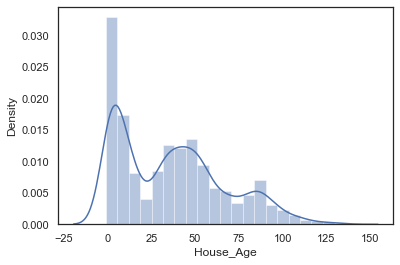

In [62]:
#Lets create a feature with age of house
year_month = ["YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]
hd["House_Age"]=hd["YrSold"]-hd["YearBuilt"]
sns.distplot(hd["House_Age"])
plt.show()

# 5.2. Interest Rate
#Lets add US Fed interest rate as a feature. Interest rate determine how much we will have to pay to borrow money to buy
#a property, and they influence the value of real estate. Low interest rates tend to increase demand for property, 
#driving up prices, while high interest rates generally do the opposite.

In [63]:
#lets import interest rate data 
#Source: https://fred.stlouisfed.org/series/FEDFUNDS
#interest_df=pd.read_csv(r"C:\Users\Rohit Chaudhary\Desktop\Upgrad notes\ML2\Assignment\interest rate.csv")
#interest_df.rename(columns={"INTDSRUSM193N":"Interest_rate"}, inplace=True)


In [64]:
#interest_df.DATE=pd.to_datetime(interest_df.DATE)

In [65]:

#interest_df["YrSold"]=interest_df.DATE.dt.year
#interest_df["MoSold"]=interest_df.DATE.dt.month
#interest_df=interest_df.drop(["DATE"],axis=1)

In [66]:
#plt.figure(figsize=(10,5))
#sns.lineplot(interest_df.YrSold,interest_df.Interest_rate)
#plt.show()

In [67]:
#hd=hd.merge(interest_df, on=["YrSold","MoSold"], how="inner")

In [68]:
#Lets visualize interest rates from 2006 to 2010
#sns.lineplot(hd.YrSold,hd.Interest_rate, color='r')
#plt.xticks(rotation="90")
#plt.show()

In [69]:
# rates has been significantly reduced by Feds from 6% to 1% mainly because of Recession due to Housing bubble.

In [70]:
#hd.drop(['MoSold'], axis=1, inplace=True)

In [71]:
hd.shape

(2919, 229)

### 4.4 Correlation

In [72]:
#Lets check correlation among the data
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]
x=list(hd.columns)
print("Top Absolute Correlations")
print(get_top_abs_correlations(hd[x], 50))


Top Absolute Correlations
MSSubClass_90         BldgType_Duplex          1.000000
YearBuilt             House_Age                0.999060
SaleType_New          SaleCondition_Partial    0.986573
Exterior1st_CemntBd   Exterior2nd_CmentBd      0.983411
Exterior1st_VinylSd   Exterior2nd_VinylSd      0.978188
MSSubClass_190        BldgType_2fmCon          0.975118
Exterior1st_MetalSd   Exterior2nd_MetalSd      0.969712
MSSubClass_80         HouseStyle_SLvl          0.958428
GarageQual            GarageCond               0.946656
GarageCond            GarageType_No Garage     0.940060
RoofStyle_Gable       RoofStyle_Hip            0.939469
GarageQual            GarageType_No Garage     0.933017
GarageCars            GarageArea               0.889689
Exterior1st_HdBoard   Exterior2nd_HdBoard      0.887999
MSZoning_FV           Neighborhood_Somerst     0.867135
MSSubClass_45         HouseStyle_1.5Unf        0.864323
Exterior1st_Wd Sdng   Exterior2nd_Wd Sdng      0.861610
BsmtFinType2          

There are lot of features which are highly corelated. We will drop one of the feature from pair with high collenarity>0.7, Accordingly, dropping following:

`'YrSold','GarageArea','YearBuilt','Exterior2nd_HdBoard','MSZoning_FV','Exterior2nd_WdSdng','TotRmsAbvGrd','HouseStyle_2Story',
'MSZoning_RM','1stFlrSF','MasVnrType_None','HouseStyle_1Story', 'Foundation_CBlock','Exterior2nd_Stucco','BldgType_TwnhsE',
'GarageYrBlt','SaleType_WD','MSSubClass_60','Exterior2nd_Plywood','Heating_GasW','MSSubClass_85','GarageType_Detchd',
'ExterQual','BsmtFinType1','RoofStyle_Shed'`


In [73]:
#col_drop=['MSSubClass_90','Exterior2nd_CBlock','YearBuilt','SaleCondition_Partial','BldgType_2fmCon',
#        'Exterior2nd_VinylSd','Exterior2nd_CmentBd','Exterior2nd_MetalSd','GarageCond','GarageType_No Garage',
 #       'HouseStyle_SLvl','RoofStyle_Hip','HouseStyle_1.5Unf','YrSold', 'GarageCars','Exterior2nd_HdBoard',
  #      'MSZoning_FV','Exterior2nd_Wd Sdng','TotRmsAbvGrd','HouseStyle_2Story','MSZoning_RM','1stFlrSF',
   #     'MasVnrType_None','HouseStyle_1Story', 'Foundation_CBlock','Exterior2nd_Stucco','BldgType_TwnhsE',
    #    'GarageYrBlt','SaleType_WD','MSSubClass_60','Exterior2nd_Plywood','Heating_GasW','MSSubClass_85',
    #    'GarageType_Detchd','ExterQual','BsmtFinType1','RoofStyle_Shed']                                                             

In [74]:
#hd=hd.drop(col_drop, axis=1)

In [75]:
#Checking unique values in dataset in order to drop features with single value 
#or 1 unique value as these features will not be helful in prediction
Nil_unique_value_col=[]
for i in hd.columns:
    if len(hd[i].unique())==1:
        Nil_unique_value_col.append(i)
print(Nil_unique_value_col)

['LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [76]:
#Dropping these features as they are making any value addition
hd=hd.drop(Nil_unique_value_col, axis=1)

In [77]:
hd.shape

(2919, 222)

# 6. Model Development-Validation and Evaluaiton

In [78]:
#As we have been provided with only train dataset, test_train split shall not be required in instant case.

In [79]:
#We need to scale the data in order to interpret data and to expedite the process of gradient descent
#Remaining numeric features which require scaling 
vars_scale=ordinal+numeric+year_month +['House_Age','SalePrice'] # 'Interest_rate'
for i in (Nil_unique_value_col +  ['MoSold']):#(['ExterQual', 'GarageYrBlt','YearBuilt', 'BsmtFinType1','1stFlrSF', 
                               # 'TotRmsAbvGrd','GarageCars', 'GarageCond', 'YrSold',]):
    vars_scale.remove(i)
    
hd["SalePrice"]= y_train

In [80]:
#Lets perform normalization on the numeric data
from sklearn.preprocessing import MinMaxScaler
#Creating scaler object
scaler=MinMaxScaler()
# Now normalization needs to be performed on all the numeric and label encoded varaibles
hd[vars_scale]=scaler.fit_transform(hd[vars_scale])

In [81]:
hd["SalePrice"].head()

0    0.581431
1    0.536319
2    0.604029
3    0.451871
4    0.640477
Name: SalePrice, dtype: float64

In [82]:
y_train =hd["SalePrice"]
hd=hd.drop(["SalePrice"], axis=1)

In [83]:
hd.shape

(2919, 222)

In [84]:
hd.GrLivArea.head()

0    0.375618
1    0.253324
2    0.396364
3    0.377528
4    0.508831
Name: GrLivArea, dtype: float64

0    208500
1    181500
2    223500
3    140000
4    250000

0    1710.0
1    1040.0
2    1279.0
3     778.0
4     988.0

In [85]:
#Defining X & Y for Regression
X_train =hd.iloc[0:1460,]
X_test = hd.iloc[1460:,]

In [87]:
y_train=y_train.iloc[0:1460,]

Since we have to check performance on unseen data, therefore lets further divide X into into train and test

In [88]:
#from sklearn.model_selection import train_test_split
#X_train, X_val, y_train, y_val =train_test_split(X, y, train_size=0.8, random_state=42)

In [89]:
X_train.shape,X_test.shape

((1460, 222), (1459, 222))

## 6.1 Linear Regression

#### 6.1.2 Linear regression with 50 no. of features using RFE

In [96]:
#Linear Regression Object
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [97]:
lr=LinearRegression()
rfe=RFE(lr,50)

In [98]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [99]:
#Top 30 no. of features in regression modeL
rfe_df=pd.DataFrame()
rfe_df["features"]=X_train.columns
rfe_df["Selected"]=rfe.support_
rfe_df["Ranking"]=rfe.ranking_
features=list(rfe_df[rfe_df["Ranking"]==1]["features"].values)
features

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'YrSold',
 'MSSubClass_45',
 'MSSubClass_90',
 'MSSubClass_160',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Neighborhood_Crawfor',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRNn',
 'BldgType_Duplex',
 'HouseStyle_1.5Unf',
 'RoofStyle_Shed',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_CBlock',
 'Heating_Grav',
 'Functional_Maj2',
 'Functional_Mod',
 'Functional_Sev',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'GarageType_No Garage',
 'House_Age']

In [100]:
#Linear Regression using these top 30 features
lr=LinearRegression()
lr.fit(X_train[features], y_train)

LinearRegression()

#### 6.1.3 Predictions and Residual Analysis

In [101]:
#Lets verify assumptions of Linear Regression on residuals
y_train_pred=lr.predict(X_train[features])

In [102]:
#Residuals 
res_train=y_train_pred-y_train

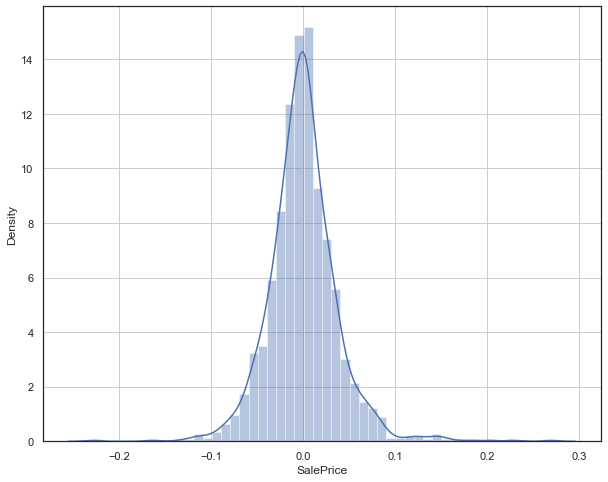

In [103]:
#Lets check residuals distribution
plt.figure(figsize=(10,8))
sns.distplot(res_train)
plt.grid()
plt.show()

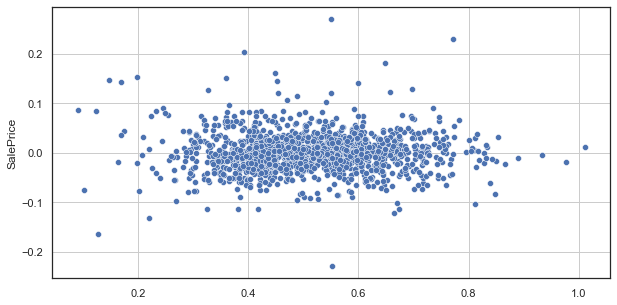

In [104]:
#Checking Homoscedasticity
plt.figure(figsize=(10,5))
sns.scatterplot(y_train_pred, res_train)
plt.grid()
plt.show()

In [105]:
#Coefficients in model
Lin_reg_coeff=pd.DataFrame({"Feature":X_train[features].columns, "coeff":lr.coef_ })
Lin_reg_coeff.sort_values(by="coeff", key=abs, ascending =False, inplace =True)
Lin_reg_coeff

,Feature,coeff
3,YearBuilt,-3.598509e+11
49,House_Age,-3.572433e+11
10,YrSold,1.043046e+10
25,BldgType_Duplex,-6.887435e+09
12,MSSubClass_90,6.887435e+09
38,Exterior2nd_CBlock,-3.902385e+09
36,Exterior1st_CBlock,3.902385e+09
29,RoofMatl_Membran,6.603427e-01
30,RoofMatl_Metal,6.082473e-01
34,RoofMatl_WdShngl,5.901642e-01


In [106]:
pip install RegscorePy

Note: you may need to restart the kernel to use updated packages.


In [107]:
#Checking r2 score and mean_squared_error on  train data after Linear Regression
from RegscorePy import *
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def get_evaluation_metrics(true,predicted,Regression, features):
    Evaluation_metric=pd.DataFrame({"R_squared_score": round(r2_score(true, predicted),3),
                                    "Adjusted R2 score" :round(1 - (1-r2_score(true, predicted))*((1460-1)/(1460-features-1)),3),
                                    "Mean absolute error":round(mean_absolute_error(true, predicted),5),
                                    "Mean Squared error":round(mean_squared_error(true, predicted),5),
                                    "AIC" : round(aic.aic(true, predicted, features),2),
                                    "BIC" : round(bic.bic(true, predicted, features),2),
                                   "Features":features}, index=[Regression])
    print("Evaluation metrics are as under:")
    return Evaluation_metric
Linear_regression_metrics=get_evaluation_metrics(y_train,y_train_pred, "Linear_regression",len(features))
Linear_regression_metrics

Evaluation metrics are as under:


,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Linear_regression,0.916,0.913,0.02638,0.00142,-9475.8,-9211.49,50


## 6.2 Ridge Regression

In Ridge regression additional penalty of lambda times sum of all the sum of sqaure of errors is added to cost function.
- Firstly we we will calculate best value of lambda using Grid Search CV
- Then using this lambda model will be tunned and predictions evaluation shall be made

#### 6.2.1 Ridge Regression with GridSearchCV for hypertunning alpha parameter

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
folds=5
ridge=Ridge()
score_params=["r2","neg_mean_absolute_error","neg_mean_squared_error"]
parmas={"alpha":[0,0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10,100,1000]}
for score in score_params:
    model_cv=GridSearchCV(estimator=ridge,
                         param_grid =parmas,
                         scoring=score,
                         cv=folds,
                         verbose=1,
                         return_train_score=True)
    model_cv.fit(X_train, y_train)
    print("Considering ", score , "as parameter ",model_cv.best_params_ )

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Considering  r2 as parameter  {'alpha': 4}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Considering  neg_mean_absolute_error as parameter  {'alpha': 3}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Considering  neg_mean_squared_error as parameter  {'alpha': 4}


In [109]:
#Regression model using alpha as 3
ridge=Ridge(4)
ridge.fit(X_train, y_train)

Ridge(alpha=4)

#### 6.2.2 Predictions and Residual Analysis

In [110]:
#Coeffecient of Ridge Regression
y_train_pred=ridge.predict(X_train)
Coeff_ridge=pd.DataFrame({"Feature":X_train.columns, "coeff_ridge":ridge.coef_ })
Coeff_ridge.sort_values(by="coeff_ridge", key=abs,ascending =False, inplace =True)
Coeff_ridge

,Feature,coeff_ridge
3,OverallQual,0.118722
21,GrLivArea,0.100741
19,1stFlrSF,0.076434
4,OverallCond,0.074928
105,Condition2_PosN,-0.058893
18,TotalBsmtSF,0.054474
20,2ndFlrSF,0.053171
31,GarageCars,0.052505
91,Neighborhood_StoneBr,0.047101
131,RoofMatl_WdShngl,0.044823


In [111]:
#Checking r2 score and mean_squared_error on tet and train data after Ridge Regression
Ridge_metrics=get_evaluation_metrics(y_train,y_train_pred,"Ridge_Regression",X_train.shape[1] )
Ridge_metrics

Evaluation metrics are as under:


,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Ridge_Regression,0.924,0.91,0.02401,0.00129,-9269.9,-8096.36,222


In [112]:
#Residuals
res_train=y_train_pred-y_train

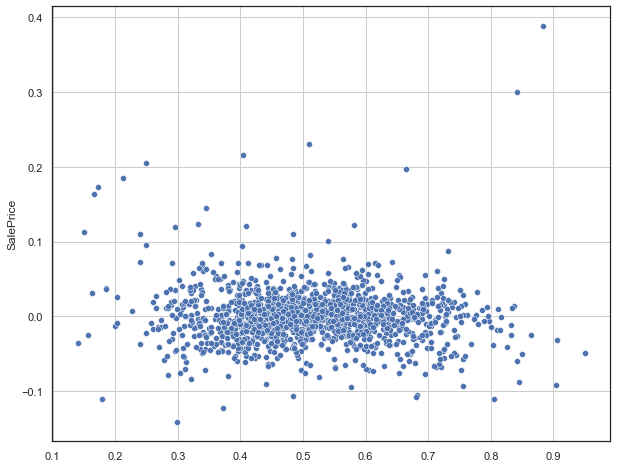

In [113]:
plt.figure(figsize=(10,8))
sns.scatterplot(y_train_pred,res_train)
plt.grid()
plt.show()

In [114]:
#plt.figure(figsize=(20,20))
#sns.scatterplot(hd.index,y_train, color='r')
#sns.scatterplot(hd.index,y_train_pred,color='b')
#plt.show()

## 6.3 Lasso Regression

In Lasso regression additional penalty of lambda times sum of all the sum of absolute errors is added to cost function. As compared to Ridge Regression lasso regression also helps in feature elimination. As seen above in ridge regression there are many models, in order to predict which features are affected Sale price of houses.

- Firstly we we will calculate best value of lambda using Grid Search CV.
- Using this lambda model will be tunned and predictions evaluation shall be made.

#### 6.3.1 Lasso Regression with GridSearchCV for hypertunning alpha parameter

In [115]:
from sklearn.linear_model import Lasso
folds=5
lasso=Lasso()
score_params=["r2","neg_mean_absolute_error","neg_mean_squared_error"]
parmas={"alpha":[0,0.005,0.006,0.007,0.0008,0.0009,0.001,0.0011,0.0015,0.01,0.1,1,10]}
for score in score_params:
    model_cv=GridSearchCV(estimator=lasso,
                         param_grid =parmas,
                         scoring=score,
                         cv=folds,
                         verbose=1,
                         return_train_score=True)
    model_cv.fit(X_train, y_train)
    print("Considering ",score , "as parameter ",model_cv.best_params_)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
Considering  r2 as parameter  {'alpha': 0.0008}
Fitting 5 folds for each of 13 candidates, totalling 65 fits
Considering  neg_mean_absolute_error as parameter  {'alpha': 0}
Fitting 5 folds for each of 13 candidates, totalling 65 fits
Considering  neg_mean_squared_error as parameter  {'alpha': 0.0008}


In [116]:
#Lasso object 
lasso=Lasso(0.0008)
#fitting
lasso.fit(X_train, y_train)

Lasso(alpha=0.0008)

#### 6.3.2 Predictions and Residual Analysis

In [117]:
#Coeffecients
y_train_pred=lasso.predict(X_train)
lasso_df=pd.DataFrame({"Feature":X_train.columns, "coeff_lasso":lasso.coef_ })
lasso_df.sort_values(by="coeff_lasso",key=abs, ascending =False, inplace =True)
lasso_df[lasso_df["coeff_lasso"]!=0]

,Feature,coeff_lasso
21,GrLivArea,0.259467
3,OverallQual,0.190044
31,GarageCars,0.076428
18,TotalBsmtSF,0.060417
1,LotArea,0.040702
4,OverallCond,0.034034
28,Fireplaces,0.032348
6,YearRemodAdd,0.029454
178,CentralAir_Y,0.024722
13,BsmtFinType1,0.021381


In [118]:
#no. of features after Lasso Regression
len(lasso_df[lasso_df["coeff_lasso"]!=0])

41

So after Lasso Regression we are left with only 38 features from 173 no. of total features.

In [119]:
#Checking r2 score and mean_squared_error on tet and train data after Lasso Regression
Lasso_metrics=get_evaluation_metrics(y_train,y_train_pred,"Lasso_Regression",len(lasso_df[lasso_df["coeff_lasso"]!=0]))
Lasso_metrics

Evaluation metrics are as under:


,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Lasso_Regression,0.889,0.885,0.02924,0.00188,-9083.54,-8866.81,41


In [120]:
#residuals
res_train=y_train_pred-y_train

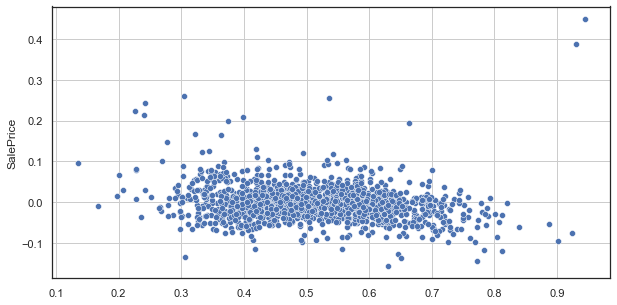

In [121]:
#variance of residuals
plt.figure(figsize=(10,5))
sns.scatterplot(y_train_pred,res_train)
plt.grid()
plt.show()

## 6.4 ElasticNet Regression

In Elasticnet regression is a balanced regression technique which comprises of both ridge and lasso regession

- Firstly we we will calculate best value of lambda using Grid Search CV.
- Using this lambda model will be tunned and predictions evaluation shall be made.

In [122]:
from sklearn.linear_model import ElasticNet
#folds
folds=5
params_grid=({'alpha': [0,0.0001, 0.0002,0000.3,0.0004,0.0005,0.0006, 0.0007,0.0008,0.0009,0.001,0.01,0.1,10,100, 1000]})

elastic=ElasticNet()
scoring_para=["r2","neg_mean_squared_error","neg_mean_absolute_error"]
for score in scoring_para:
    cv_model=GridSearchCV(estimator=elastic,
                         cv=folds,
                         scoring=score,
                         param_grid=params_grid,
                         verbose=1,
                         return_train_score=True)
    cv_model.fit(X_train,y_train)
    print("Considering ",score , "as parameter ",model_cv.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Considering  r2 as parameter  {'alpha': 0.0008}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Considering  neg_mean_squared_error as parameter  {'alpha': 0.0008}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Considering  neg_mean_absolute_error as parameter  {'alpha': 0.0008}


In [123]:
#modelling using alpha as 0.0008
elastic=ElasticNet(0.0008)
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.0008)

In [124]:
y_train_pred=elastic.predict(X_train)
elastic_df=pd.DataFrame({"Feature":X_train.columns, "coeff_elastic":elastic.coef_ })
elastic_df.sort_values(by="coeff_elastic", key=abs, ascending =False, inplace =True)
elastic_df[elastic_df["coeff_elastic"]!=0]

,Feature,coeff_elastic
21,GrLivArea,0.238792
3,OverallQual,0.171874
31,GarageCars,0.076376
4,OverallCond,0.066934
18,TotalBsmtSF,0.059853
1,LotArea,0.044291
28,Fireplaces,0.029745
85,Neighborhood_NridgHt,0.027990
14,BsmtFinSF1,0.026421
202,SaleType_New,0.025768


In [125]:
elastic_df[elastic_df["coeff_elastic"]!=0].shape[0]

65

So in using Elastic net Regression we are left with 53 no. of features

In [126]:
Elastic_metrics=get_evaluation_metrics(y_train,y_train_pred,"Elastic_Regression",elastic_df[elastic_df["coeff_elastic"]!=0].shape[0])
Elastic_metrics

Evaluation metrics are as under:


,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Elastic_Regression,0.904,0.9,0.02662,0.00161,-9256.62,-8913.02,65


In [127]:
#Comaprison of evaluation metrics
Comp_df=pd.concat([Ridge_metrics,Lasso_metrics, Linear_regression_metrics,Elastic_metrics])
Comp_df.head()

,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Ridge_Regression,0.924,0.910,0.02401,0.00129,-9269.90,-8096.36,222
Lasso_Regression,0.889,0.885,0.02924,0.00188,-9083.54,-8866.81,41
Linear_regression,0.916,0.913,0.02638,0.00142,-9475.80,-9211.49,50
Elastic_Regression,0.904,0.900,0.02662,0.00161,-9256.62,-8913.02,65


#### From above it is observed that:
- As per R2 score:  `Ridge_Regression>Linear_reg>Elastic_Regression>Lasso_Regression`
- As per Mean absolute error : `Ridge_Regression>Linear_reg>Elastic_Regression>Lasso_Regression`
- As per Mean Squared error : `Ridge_Regression>Linear_reg>Elastic_Regression>Lasso_Regression`
- As per AIC  : `Lasso_Regression>Elastic_Regression>Ridge_Regression>Linear_reg`
- As per BIC  : `Ridge_Regression>Lasso_Regression>Elastic_Regression>Linear_reg`    
- No. of features: `Lasso_Regression>Linear_reg>Elastic_Regression>Ridge_Regression`

From above, Ridge Regression is performing slightly better compared to other models in terms of BIC, AIC, adjusted R2 score.

In [128]:
#Lets check out top ten coefficent in all the models 
top_ten_elastic_coeff=elastic_df[elastic_df["coeff_elastic"]!=0].head(10).reset_index().drop(["index"], axis=1)
top_ten_lasso_coeff=lasso_df[lasso_df["coeff_lasso"]!=0].head(10).reset_index().drop(["index"], axis=1)
top_ten_ridge_coeff=Coeff_ridge[Coeff_ridge["coeff_ridge"]!=0].head(10).reset_index().drop(["index"], axis=1)
top_ten_linear_coeff=Lin_reg_coeff[Lin_reg_coeff["coeff"]!=0].head(10).reset_index().drop(["index"], axis=1)

In [129]:
comp_coeff=pd.concat([top_ten_elastic_coeff,top_ten_lasso_coeff,top_ten_ridge_coeff,top_ten_linear_coeff], axis=1)
comp_coeff

,Feature,coeff_elastic,Feature,coeff_lasso,Feature,coeff_ridge,Feature,coeff
0,GrLivArea,0.238792,GrLivArea,0.259467,OverallQual,0.118722,YearBuilt,-3.598509e+11
1,OverallQual,0.171874,OverallQual,0.190044,GrLivArea,0.100741,House_Age,-3.572433e+11
2,GarageCars,0.076376,GarageCars,0.076428,1stFlrSF,0.076434,YrSold,1.043046e+10
3,OverallCond,0.066934,TotalBsmtSF,0.060417,OverallCond,0.074928,BldgType_Duplex,-6.887435e+09
4,TotalBsmtSF,0.059853,LotArea,0.040702,Condition2_PosN,-0.058893,MSSubClass_90,6.887435e+09
5,LotArea,0.044291,OverallCond,0.034034,TotalBsmtSF,0.054474,Exterior2nd_CBlock,-3.902385e+09
6,Fireplaces,0.029745,Fireplaces,0.032348,2ndFlrSF,0.053171,Exterior1st_CBlock,3.902385e+09
7,Neighborhood_NridgHt,0.027990,YearRemodAdd,0.029454,GarageCars,0.052505,RoofMatl_Membran,6.603427e-01
8,BsmtFinSF1,0.026421,CentralAir_Y,0.024722,Neighborhood_StoneBr,0.047101,RoofMatl_Metal,6.082473e-01
9,SaleType_New,0.025768,BsmtFinType1,0.021381,RoofMatl_WdShngl,0.044823,RoofMatl_WdShngl,5.901642e-01


In [130]:
from sklearn.tree import DecisionTreeRegressor

In [131]:
tree=DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [132]:
y_train_pred=tree.predict(X_train)

In [133]:
#Checking r2 score and mean_squared_error on tet and train data after Ridge Regression
Ridge_metrics=get_evaluation_metrics(y_train,y_train_pred,"Decision Tree",X_train.shape[1] )
Ridge_metrics

Evaluation metrics are as under:


,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Decision Tree,1.0,1.0,0.0,0.0,-inf,-inf,222


In [128]:
#Using hyperparamter tunning
tree=DecisionTreeRegressor(random_state=42)
#folds

folds=5
params=({'max_depth': [5,10,25,30,35,50,80,100],
             'min_samples_leaf': [5,10,25,30,35,50,80,100]})


In [129]:
grid_search=GridSearchCV(estimator=tree,
                         cv=folds,
                         scoring="r2",
                         param_grid=params,
                         verbose=3,
                         return_train_score=True,
                         n_jobs=-1)

In [130]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 25, 30, 35, 50, 80, 100],
                         'min_samples_leaf': [5, 10, 25, 30, 35, 50, 80, 100]},
             return_train_score=True, scoring='r2', verbose=3)

In [131]:
grid_search.best_params_

{'max_depth': 25, 'min_samples_leaf': 10}

In [132]:
tree=grid_search.best_estimator_

In [133]:
y_train_pred=tree.predict(X_train)

In [134]:
#Checking r2 score and mean_squared_error on tet and train data after Ridge Regression
DT_HPT_metrics=get_evaluation_metrics(y_train,y_train_pred,"Decision Tree with HPT",X_train.shape[1] )
DT_HPT_metrics

Evaluation metrics are as under:


,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Decision Tree with HPT,0.899,0.881,0.02896,0.0017,-8863.6,-7690.07,222


### RANDOM FOREST

In [135]:
from sklearn.ensemble import RandomForestRegressor

In [136]:
rf=RandomForestRegressor(random_state=42, oob_score=True)

In [137]:
rf.fit(X_train, y_train)
y_train_pred=rf.predict(X_train)

In [138]:
#Checking r2 score and mean_squared_error on tet and train data after Ridge Regression
RF_metrics=get_evaluation_metrics(y_train,y_train_pred,"RandomForest",X_train.shape[1] )
RF_metrics

Evaluation metrics are as under:


,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
RandomForest,0.982,0.978,0.01167,0.00031,-11342.16,-10168.62,222


In [139]:
rf.oob_score_

0.8668893457267031

In [140]:
#RF with nyperparamter tunning

In [204]:
#Using hyperparamter tunning
rf=RandomForestRegressor(random_state=42, oob_score=True)
#folds

folds=5
params=({'max_features':[50,80,100,150,200],
         'n_estimators':[250],
        'max_depth': [5,10,25,30,35,50,],
         'min_samples_leaf': [10,25,30,35,50,80,100]})
grid_search=GridSearchCV(estimator=rf,
                         cv=folds,
                         scoring="r2",
                         param_grid=params,
                         verbose=3,
                         return_train_score=True,
                         n_jobs=-1)

In [205]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
Wall time: 4min 54s


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 25, 30, 35, 50],
                         'max_features': [50, 80, 100, 150, 200],
                         'min_samples_leaf': [10, 25, 30, 35, 50, 80, 100],
                         'n_estimators': [250]},
             return_train_score=True, scoring='r2', verbose=3)

In [207]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 100,
 'min_samples_leaf': 10,
 'n_estimators': 250}

In [208]:
x=pd.DataFrame(grid_search.cv_results_)

In [209]:
x[x.mean_test_score==x.mean_test_score.max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
49,2.570388,0.051233,0.034317,0.00116,10,100,10,250,"{'max_depth': 10, 'max_features': 100, 'min_samples_leaf': 10, 'n_estimators': 250}",0.873934,0.86505,0.854077,0.866243,0.847085,0.861278,0.009512,1,0.90811,0.911778,0.909046,0.90724,0.912464,0.909728,0.002048


In [210]:
rf=grid_search.best_estimator_
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features=100, min_samples_leaf=10,
                      n_estimators=250, oob_score=True, random_state=42)

In [211]:
y_train_pred=rf.predict(X_train)

In [212]:
#Checking r2 score and mean_squared_error on tet and train data after Ridge Regression
RF_HPT_metrics=get_evaluation_metrics(y_train,y_train_pred,"RandomForest with HPT",X_train.shape[1] )
RF_HPT_metrics

Evaluation metrics are as under:


,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
RandomForest with HPT,0.912,0.896,0.0251,0.00148,-9065.25,-7891.72,222


In [213]:
rf.oob_score_

0.8632226556930345

### Gradient Boosting

In [134]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()

In [135]:
gb.fit(X_train,y_train)
y_train_pred=gb.predict(X_train)

In [136]:
#Checking r2 score and mean_squared_error on tet and train data after Ridge Regression
GB_metrics=get_evaluation_metrics(y_train,y_train_pred,"Gradient Boosting",X_train.shape[1] )
GB_metrics

Evaluation metrics are as under:


,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Gradient Boosting,0.958,0.95,0.01985,0.00071,-10137.34,-8963.8,222


In [137]:
#Gradient boosting with HT

In [147]:
#Using hyperparamter tunning
gb=GradientBoostingRegressor(random_state=42)
#folds

folds=5
params=({'learning_rate': [0.1,0.2,0.4,0.6,0.8,1],
         'n_estimators':[50,100,200],
        'max_depth': [10,25,30,35],
        # 'max_features':[50,80,100,150,200],
         'min_samples_leaf': [10,25,30,35,50,80,100]})
grid_search=GridSearchCV(estimator=gb,
                         cv=folds,
                         scoring="r2",
                         param_grid=params,
                         verbose=3,
                         return_train_score=True,
                         n_jobs=-1)

In [148]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits
Wall time: 17min 46s


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.4, 0.6, 0.8, 1],
                         'max_depth': [10, 25, 30, 35],
                         'min_samples_leaf': [10, 25, 30, 35, 50, 80, 100],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='r2', verbose=3)

In [149]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 10,
 'min_samples_leaf': 30,
 'n_estimators': 100}

In [150]:
x=pd.DataFrame(grid_search.cv_results_)
x[x.mean_test_score==x.mean_test_score.max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
7,2.208579,0.030474,0.004515,0.003192,0.1,10,30,100,"{'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 30, 'n_estimators': 100}",0.908376,0.881214,0.886997,0.898836,0.879485,0.890982,0.011025,1,0.972714,0.977917,0.975331,0.975713,0.975566,0.975448,0.001654


In [151]:
gb=grid_search.best_estimator_
gb.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=10, min_samples_leaf=30, random_state=42)

In [152]:
y_train_pred=gb.predict(X_train)

In [153]:
#Checking r2 score and mean_squared_error on tet and train data after Ridge Regression
GB_HPT_metrics=get_evaluation_metrics(y_train,y_train_pred,"GradientBoosting with HPT",X_train.shape[1] )
GB_HPT_metrics

Evaluation metrics are as under:


,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
GradientBoosting with HPT,0.974,0.97,0.01379,0.00043,-10859.14,-9685.61,222


### XGBoosting

In [155]:
!pip3 install xgboost

In [158]:
import xgboost as xgb

In [159]:
XGB=xgb.XGBRegressor()

In [160]:
XGB.fit(X_train,y_train)
y_train_pred=XGB.predict(X_train)

In [166]:
y_train_pred

array([0.5800332 , 0.53725076, 0.59578526, ..., 0.6619851 , 0.45620066,
       0.46934772], dtype=float32)

In [163]:
#Checking r2 score and mean_squared_error on tet and train data 
XGB_metrics=get_evaluation_metrics(y_train,y_train_pred,"XG Boosting",X_train.shape[1] )
XGB_metrics

TypeError: Expect numeric elements in y and y_pred